# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.

**If you are using NetworkX in your assignment, you can copy this function into module03.py**

In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

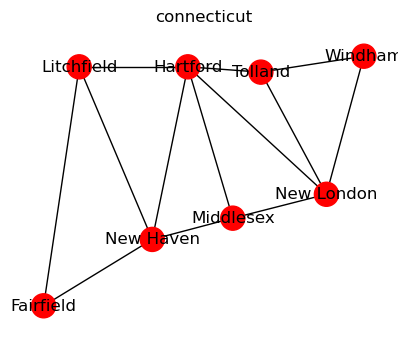

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. You can roll your own from Depth First Search or use the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You will also need to implement one of the following heuristics: **Minimum Remaining Values** or **Degree Heuristic** (tell me which one; it doesn't make sense to implement both) as well as **Least Constraining Value**. Break ties in ascending order (least to most).

You should get the backtracking and forward checking implemented first. Then add the heuristics. You can use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

    backtracking: yes
    forward checking: yes
    minimum remaining values: no
    degree heuristic: yes
    least contraining value: yes

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`. 

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement). For example, if your program starts to backtrack, the trace should say that it has to backtrack and why.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

**check_assignment_consistency**

The `check_assignment_consistency` is a helper function for `backtack`function. It check if the choen color is consistent by checking if the color matches the color chosen by any of the adjacent nodes.

Parameters:
* **csp** is the dictionary that contains the domain and the adjacent node list for each of the variables.
* **var** is the current variable we want to check the consistency for.
* **value** is the color value we want to check consistency with.
* **assignment** is the dictionary of variables with already chosen color value

retuns:<br>
It returns `True` if the value is consistent otherwise it returns `False`

In [5]:
def check_assignment_consistency(csp, var, value, assignment):
    status = True
    for adjacent in csp[var]["adjacent"]:
        if adjacent in assignment.keys():
            if assignment[adjacent] == value:
                status = False
    return status

**least_contraining_value**

The `least_contraining_value` is a helper function for `backtack`function. It creates a list of values from least constraining values to most constraining for the given variable domain. 

Parameters:
* **csp** is the dictionary that contains the domain and the adjacent node list for each of the variables.
* **var** is the current variable we want to find the list of least constaning values for.
* **assignment** is the dictionary of variables with already chosen color value.

retuns:<br>
It returns the list of `domain` values for the given variable, sorted in ascending order(from least constraning value to most constraning value). 

In [6]:
def least_contraining_value(csp, var, assignmnet):
    count = {}
    for val in csp[var]["domain"]:
        count[val] = 0
    
    for adj_node in csp[var]["adjacent"]:
        if adj_node not in assignmnet:
            for val in csp[var]["domain"]:
                count[val] += 1 if val in csp[adj_node]["domain"] else 0
    
    # create a list of touples and sort     
    lst = [(val, count[val]) for val in count.keys()]
    lst.sort(key = lambda x: x[1])

    return [val[0] for val in lst]

**degree_heuristic**

The `degree_heuristic` is a helper function for `backtack`function. It finds the the variable with the most constrains.

Parameters:
* **csp** is the dictionary that contains the domain and the adjacent node list for each of the variables.
* **assignment** is the dictionary of variables with already chosen color value.

retuns:<br>
It returns the the `variable` with the most constrains.

In [7]:
def degree_heuristic(csp, assignment):
    nodes = [node for node in csp if node not in assignment]
    sorted_nodes = sorted(nodes, key = lambda node: len(csp[node]["adjacent"]), reverse=True)
    return sorted_nodes[0]

**forward_tracking**

The `forward_tracking` is a helper function for `backtack` function. It removes chosen value from the adjacent nodes of the chosen variable. 

Parameters:
* **csp** is the dictionary that contains the domain and the adjacent ndoes list for each of the variables.
* **var** is the current variable we want to apply forward tracking to.
* **assignment** is the dictionary of variables with already chosen color value.

retuns:<br>
It returns `success` if no issue is is found otherwise it returns `failure`

In [8]:
def forward_tracking(csp, var, assignment):
    for key in csp[var]["adjacent"]:
        if assignment[var] in csp[key]["domain"]:
            csp[key]["domain"].remove(assignment[var]) 

        if len(csp[key]["domain"]) == 0:
            return "failure"
    return "success"

**backtrack**<br>
The `backtrack` function is the recursive implementation of the backtracking search algorithm. It attemps to find the color combination for all varialbles with the constranin that any adjacent node of any node can not have the same color value as the node. 

Parameters:
* **csp** is the dictionary that contains the domain and the adjacent nodes list for each of the variables.
* **assignment** is the dictionary of variables with already chosen color value.
* **color_list** is the list of colors that is used to convert color values to color while printing the debugging statements.
* **trace** is the flag used to indicate whether we want to print the debugging statements. It is set to false by default.

retuns:<br>
It returns `assignmnet` if the algorithm was successful otherwise it returns `failure`.

In [9]:
def backtrack(csp, assignment, color_list, trace = False):
    if len(assignment.keys()) == len(csp.keys()):
        return assignment
    var = degree_heuristic(csp, assignment)   # choose the variable
    for value in least_contraining_value(csp, var, assignment):
        if check_assignment_consistency(csp, var, value, assignment):
            assignment[var] = value
            forward_check = forward_tracking(deepcopy(csp), var, assignment)
            print(f"Var: {var}, Color: {color_list[value]}, forward_check: {forward_check}" if forward_check == "success" else f"Var: {var}, Color: {color_list[value]}, forward_check: {forward_check}..............Backtracking") if trace else None
            if forward_check != "failure":
                csp_copy = deepcopy(csp)
                forward_tracking(csp, var, assignment)  # add interference in csp
                result = backtrack(csp, assignment, color_list, trace)
                if result != "failure":
                    return result
                print(f"Backtracking........ to {var}, Color: {color_list[value]}") if trace else None
                csp = csp_copy                          # remove interference from csp
            del assignment[var]
    return "failure"

**color_map**<br>
The `color_map` function puts the necessary information in the proper format for backtracking_search algorithm.

Parameters:
* **csp** is the dictionary that contains the domain and the adjacent nodes list for each of the variables.
* **color_list** is th list of domain values for each of the variable in cps.
* **trace** is the flag used to indicate whether we want to print the debugging statements. It is set to false by default.

retuns:<br>
It returns a `list of tuples` in form ( Node Name, Color)  if `backtrack` algorithm is successful otherwise it returns `None`.

In [10]:
def color_map(planar_map, color_list, trace=False):
    decode_edges = {} # used later to decode the edges
    for node in planar_map["nodes"]:
        decode_edges[planar_map["nodes"].index(node)] = node
    map_info = {}  # keeps track of necessary info for cps
    for node in planar_map["nodes"]: # fill in the domain values for each node
        map_info[node] = {"domain": [*range(0,len(color_list),1)], "adjacent":[]}
    
    for e1, e2 in planar_map["edges"]:  #fill in the adjacent nodes for each node
        map_info[decode_edges[e1]]["adjacent"] += [decode_edges[e2]] if decode_edges[e2] not in map_info[decode_edges[e1]]["adjacent"] else None
        map_info[decode_edges[e2]]["adjacent"] += [decode_edges[e1]] if decode_edges[e1] not in map_info[decode_edges[e2]]["adjacent"] else None
        
    color_assignment = backtrack(map_info, {}, color_list, trace)
    if color_assignment == "failure": 
        print("failure!!!") if trace else None
        return None
    else:
        lst = [(node, color_list[color_assignment[node]]) for node in planar_map["nodes"]]
        print("\nFinal assignment:\n", lst) if trace else None
        return lst

Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Problem 1. Color Connecticut Using Your Solution

In [11]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Var: Hartford, Color: red, forward_check: success
Var: New Haven, Color: blue, forward_check: success
Var: New London, Color: blue, forward_check: success
Var: Litchfield, Color: green, forward_check: success
Var: Middlesex, Color: green, forward_check: success
Var: Tolland, Color: green, forward_check: success
Var: Fairfield, Color: red, forward_check: success
Var: Windham, Color: red, forward_check: success

Final assignment:
 [('Fairfield', 'red'), ('Litchfield', 'green'), ('New Haven', 'blue'), ('Hartford', 'red'), ('Middlesex', 'green'), ('Tolland', 'green'), ('New London', 'blue'), ('Windham', 'red')]


Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

In [12]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

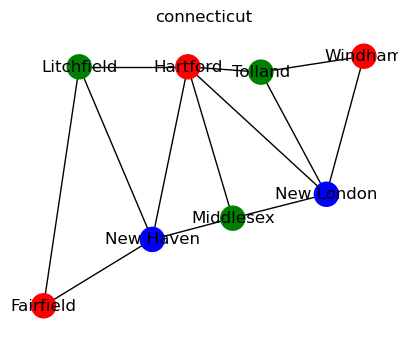

In [13]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

Var: Hartford, Color: red, forward_check: success
Var: New Haven, Color: blue, forward_check: success
Var: New London, Color: blue, forward_check: success
Var: Litchfield, Color: green, forward_check: success
Var: Middlesex, Color: green, forward_check: success
Var: Tolland, Color: green, forward_check: success
Var: Fairfield, Color: red, forward_check: success
Var: Windham, Color: red, forward_check: success

Final assignment:
 [('Fairfield', 'red'), ('Litchfield', 'green'), ('New Haven', 'blue'), ('Hartford', 'red'), ('Middlesex', 'green'), ('Tolland', 'green'), ('New London', 'blue'), ('Windham', 'red')]


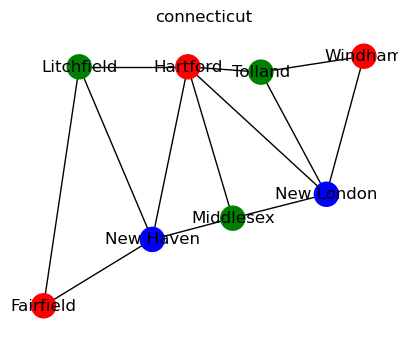

In [14]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=True)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [15]:
europe = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [16]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Var: Italy, Color: red, forward_check: success
Var: Germany, Color: red, forward_check: success
Var: Poland, Color: blue, forward_check: success
Var: Austria, Color: blue, forward_check: success
Var: Serbia, Color: red, forward_check: success
Var: Russia, Color: blue, forward_check: success
Var: France, Color: blue, forward_check: success
Var: Sweden, Color: green, forward_check: success
Var: Hungary, Color: green, forward_check: success
Var: Ukraine, Color: red, forward_check: success
Var: United Kingdom, Color: red, forward_check: success
Var: Greece, Color: blue, forward_check: success
Var: Turkey, Color: red, forward_check: success
Var: Belgium, Color: green, forward_check: success
Var: Norway, Color: yellow, forward_check: failure..............Backtracking
Backtracking........ to Belgium, Color: green
Var: Belgium, Color: yellow, forward_check: success
Var: Norway, Color: yellow, forward_check: failure..............Backtracking
Backtracking........ to Belgium, Color: yellow
Backtr

Here we're testing to see if the adjacent nodes are colored differently:

In [17]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

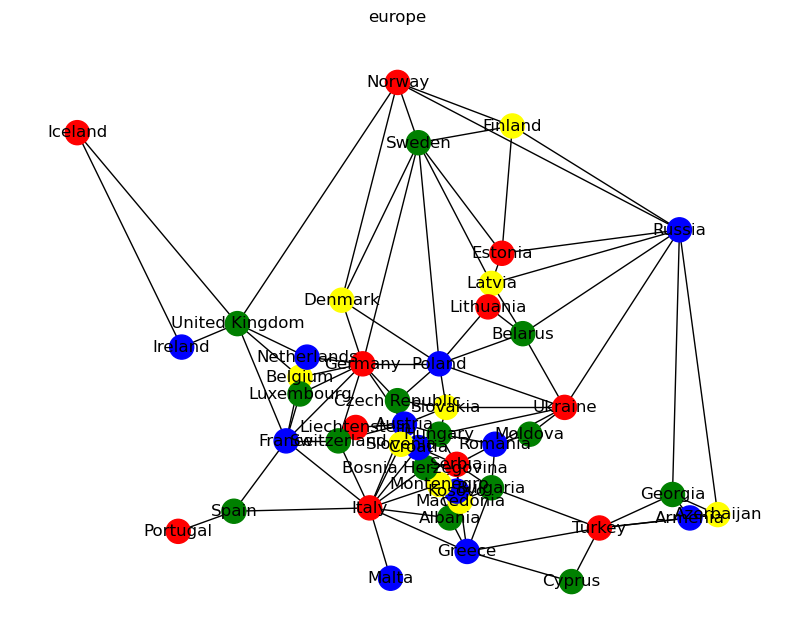

In [18]:
draw_map("europe", europe, (10,8), europe_colors)

In [19]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=True)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

Var: Italy, Color: red, forward_check: success
Var: Germany, Color: red, forward_check: success
Var: Poland, Color: blue, forward_check: success
Var: Austria, Color: blue, forward_check: success
Var: Serbia, Color: red, forward_check: success
Var: Russia, Color: blue, forward_check: success
Var: France, Color: blue, forward_check: success
Var: Sweden, Color: green, forward_check: failure..............Backtracking
Backtracking........ to France, Color: blue
Var: France, Color: green, forward_check: failure..............Backtracking
Backtracking........ to Russia, Color: blue
Var: Russia, Color: red, forward_check: success
Var: France, Color: blue, forward_check: success
Var: Sweden, Color: green, forward_check: failure..............Backtracking
Backtracking........ to France, Color: blue
Var: France, Color: green, forward_check: failure..............Backtracking
Backtracking........ to Russia, Color: red
Var: Russia, Color: green, forward_check: success
Var: France, Color: blue, forward

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.